## CSC 424 Final Project: US Census Bureau Data - American Community Survey of General Economic Conditions 2015

Government: US Census Demographic Data.

General economic characteristics of American communities are broken down in detail by census tract ID number, county, and state. The features of this dataset pertain to the general economic and employment-related conditions of different demographic and racial groups.

The data here represents general economic characteristics of all American census tracts and were collected by the US Census Bureau - each observation represents a numbered unique census tract. They are taken from the DP03 and DP05 tables of the 2015 American Community Survey 5-year estimates. A typical census tract has around ~5000 or so residents. 

- Source: US Census Bureau
- Metric Variables: 34
- Categorical Variables: 2
- Number of Samples: 74,001

**This dataset contains the following features:**
```
['CensusId',          Census tract ID
 'State',             State, DC, or Puerto Rico (52 uniques categories)
 'County',            County or county equivalent
 'TotalPop',          Total population
 'Men',               Number of men
 'Women',             Number of women
 'Hispanic',          % of population that is Hispanic/Latino
 'White',             % of population that is white
 'Black',             % of population that is black
 'Native',            % of population that is Native American or Native Alaskan
 'Asian',             % of population that is Asian
 'Pacific',           % of population that is Native Hawaiian or Pacific Islander
 'Citizen',           Number of citizens
 'Income',            Median household income
 'IncomeErr',         Median household income error 
 'IncomePerCap',      Income per capita
 'IncomePerCapErr',   Income per capita error
 'Poverty',           % under poverty level
 'ChildPoverty',      % of children under poverty level
 'Professional',      % employed in management, business, science, and arts
 'Service',           % employed in service jobs
 'Office',            % employed in sales and office jobs
 'Construction',      % employed in natural resources, construction, and maintenance
 'Production',        % employed in production, transportation, and material movement
 'Drive',             % commuting alone in a car, van, or truck
 'Carpool',           % carpooling in a car, van, or truck
 'Transit',           % commuting on public transportation
 'Walk',              % walking to work
 'OtherTransp',       % commuting via other means
 'WorkAtHome',        % working at home
 'MeanCommute',       Mean commute time (minutes)
 'Employed',          % employed (16+)
 'PrivateWork',       % employed in private industry
 'PublicWork',        % employed in public jobs
 'SelfEmployed',      % self-employed
 'FamilyWork',        % in unpaid family work
 'Unemployment']      Unemployment rate (%)
```

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

In [2]:
census_df = pd.read_csv('acs2015_county_data.csv')
census_df.head()

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,...,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,...,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,...,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,...,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7


In [3]:
census_df.shape

(3220, 37)

In [4]:
census_df['State'].value_counts()

Texas                   254
Georgia                 159
Virginia                133
Kentucky                120
Missouri                115
Kansas                  105
Illinois                102
North Carolina          100
Iowa                     99
Tennessee                95
Nebraska                 93
Indiana                  92
Ohio                     88
Minnesota                87
Michigan                 83
Mississippi              82
Puerto Rico              78
Oklahoma                 77
Arkansas                 75
Wisconsin                72
Pennsylvania             67
Alabama                  67
Florida                  67
South Dakota             66
Colorado                 64
Louisiana                64
New York                 62
California               58
Montana                  56
West Virginia            55
North Dakota             53
South Carolina           46
Idaho                    44
Washington               39
Oregon                   36
New Mexico          

In [5]:
census_df[census_df['Women'] == census_df['Women'].max()]

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
204,6037,California,Los Angeles,10038388,4945351,5093037,48.2,26.9,8.0,0.2,...,2.8,2.3,5.1,30.0,4635465,79.0,11.5,9.4,0.2,10.0


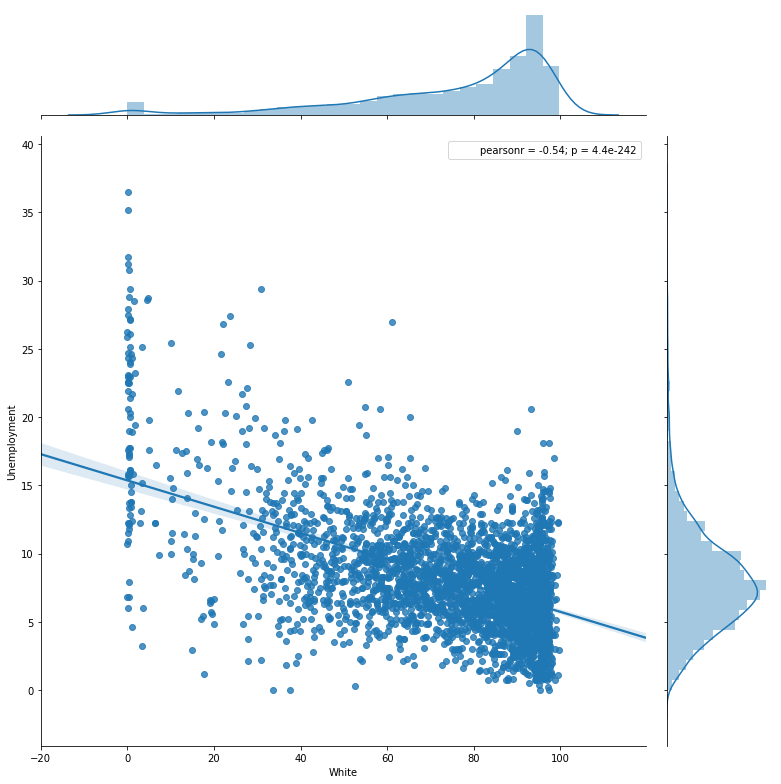

In [6]:
sns.jointplot(x='White', y='Unemployment', data=census_df, kind='reg', size=11)

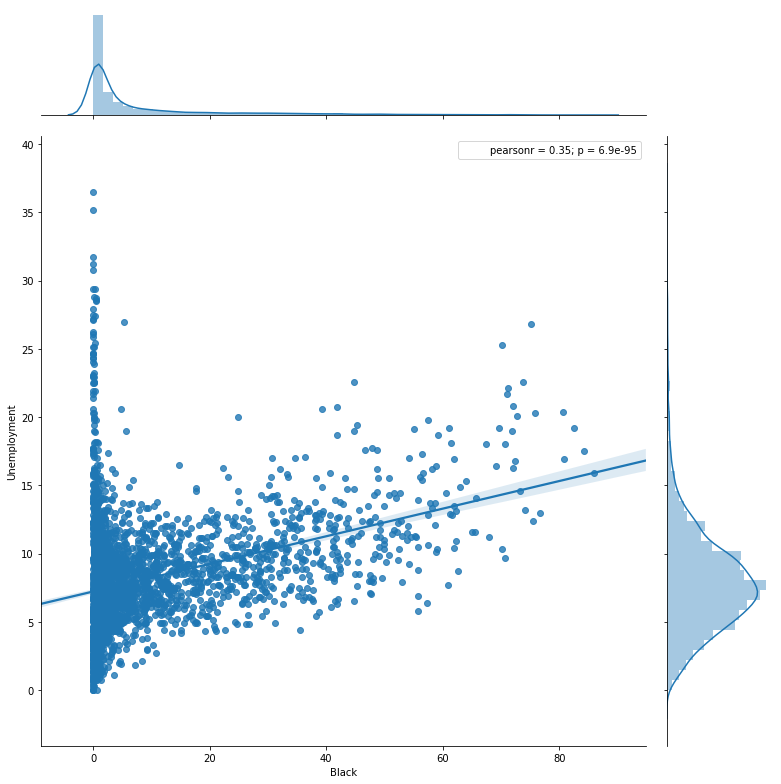

In [7]:
sns.jointplot(x='Black', y='Unemployment', data=census_df, kind='reg', size=11)

In [8]:
census_df.isnull().any()

CensusId           False
State              False
County             False
TotalPop           False
Men                False
Women              False
Hispanic           False
White              False
Black              False
Native             False
Asian              False
Pacific            False
Citizen            False
Income              True
IncomeErr           True
IncomePerCap       False
IncomePerCapErr    False
Poverty            False
ChildPoverty        True
Professional       False
Service            False
Office             False
Construction       False
Production         False
Drive              False
Carpool            False
Transit            False
Walk               False
OtherTransp        False
WorkAtHome         False
MeanCommute        False
Employed           False
PrivateWork        False
PublicWork         False
SelfEmployed       False
FamilyWork         False
Unemployment       False
dtype: bool

In [9]:
census_df[census_df['Income'].isnull()]

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
2673,48301,Texas,Loving,117,74,43,35.0,41.0,0.0,12.8,...,8.1,0.0,16.1,25.4,62,71.0,27.4,1.6,0.0,15.1


In [10]:
census_df[census_df['IncomeErr'].isnull()]

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
2673,48301,Texas,Loving,117,74,43,35.0,41.0,0.0,12.8,...,8.1,0.0,16.1,25.4,62,71.0,27.4,1.6,0.0,15.1


In [11]:
census_df.drop(2673, inplace=True)

In [12]:
census_df[census_df['ChildPoverty'].isnull()]

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
548,15005,Hawaii,Kalawao,85,42,43,4.7,37.6,0.0,0.0,...,40.3,14.9,3.0,9.2,64,25.0,64.1,10.9,0.0,0.0


In [13]:
census_df.drop(548, inplace=True)

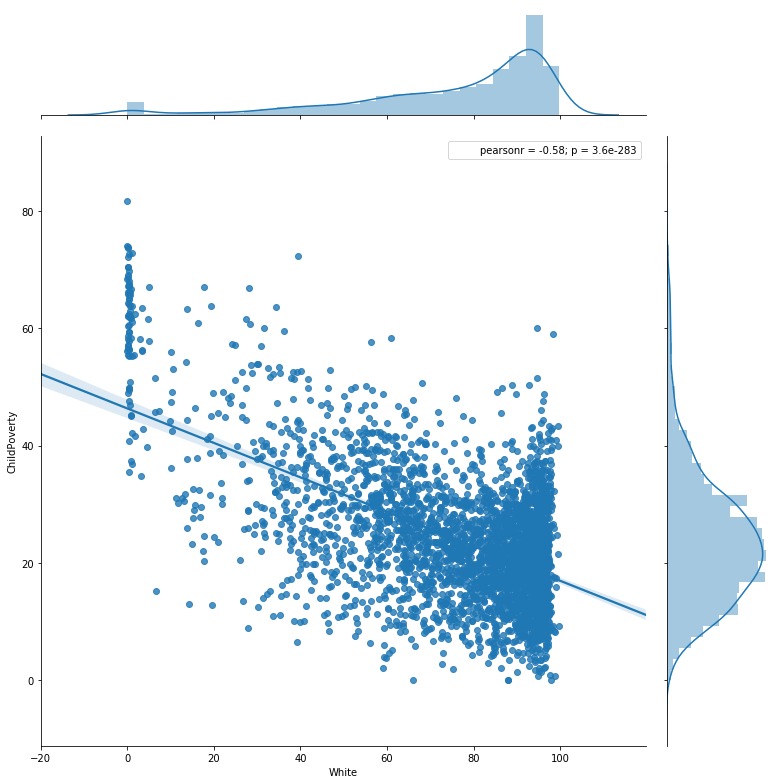

In [25]:
sns.jointplot(x='White', y='ChildPoverty', data=census_df, kind='reg', size=11)

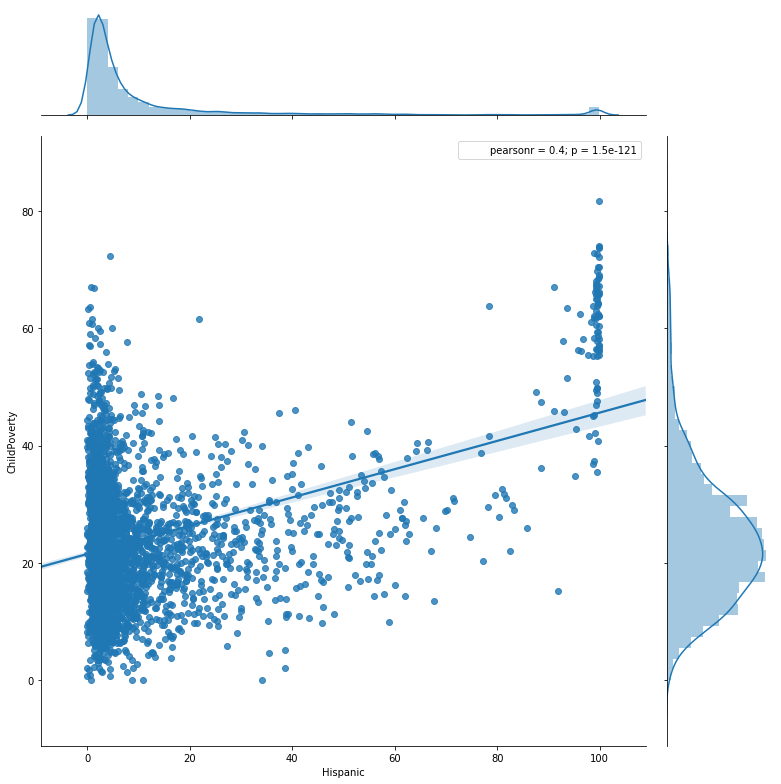

In [26]:
sns.jointplot(x='Hispanic', y='ChildPoverty', data=census_df, kind='reg', size=11)

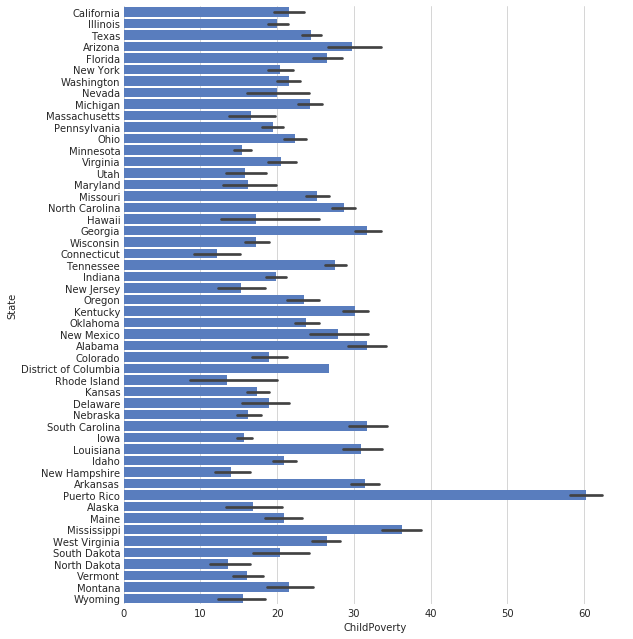

In [37]:
# create a new dataframe sorted by total population descending:
sorted_by_childpoverty = census_df.sort_values('TotalPop', axis=0, ascending=False)

sns.set_style('whitegrid')
sns.set_color_codes('muted')
plt.figure(figsize=(9,11))

sns.barplot(x=sorted_by_childpoverty['ChildPoverty'], 
            y=sorted_by_childpoverty['State'], 
            data=sorted_by_childpoverty, label='Child Poverty', 
            color='b')
sns.despine(left=True, bottom=True)

### Reduce the dimensionality and visualize the data:
- Use PCA to collapse our 37 features down to 3

In [16]:
# create a subset of plottable features:
features_plot = ['Men', 
                 'Women', 
                 'Hispanic', 
                 'White', 
                 'Black', 
                 'Native', 
                 'Asian', 
                 'Pacific', 
                 'Citizen', 
                 'Income', 
                 'IncomePerCap', 
                 'Poverty', 
                 'ChildPoverty', 
                 'Professional', 
                 'Service', 
                 'Office', 
                 'Construction', 
                 'Production', 
                 'Drive', 
                 'Carpool', 
                 'Transit', 
                 'Walk', 
                 'OtherTransp', 
                 'WorkAtHome', 
                 'MeanCommute', 
                 'Employed', 
                 'PrivateWork', 
                 'PublicWork', 
                 'SelfEmployed', 
                 'FamilyWork', 
                 'Unemployment']
cluster_plot_df = census_df[features_plot]

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(cluster_plot_df)
cluster_plot_df = scaler.transform(cluster_plot_df)

In [14]:
# we have 6 races, is there a set of 6 clusters visible within the data?
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [20]:
kmeans6 = KMeans(n_clusters=6, random_state=123).fit_predict(cluster_plot_df)
pca3 = PCA(n_components=3, random_state=123)
pca3.fit(cluster_plot_df)
pca3_to_plot = pca3.transform(cluster_plot_df)

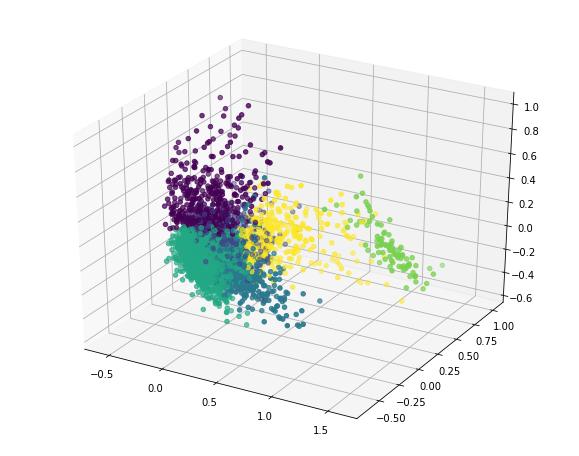

In [21]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111, projection = '3d')
x_ax = np.array(pca3_to_plot[:, 0]).flatten()
y_ax = np.array(pca3_to_plot[:, 1]).flatten()
z_ax = np.array(pca3_to_plot[:, 2]).flatten()
ax.scatter(x_ax, y_ax, z_ax, c = kmeans6, marker = 'o')
plt.show()

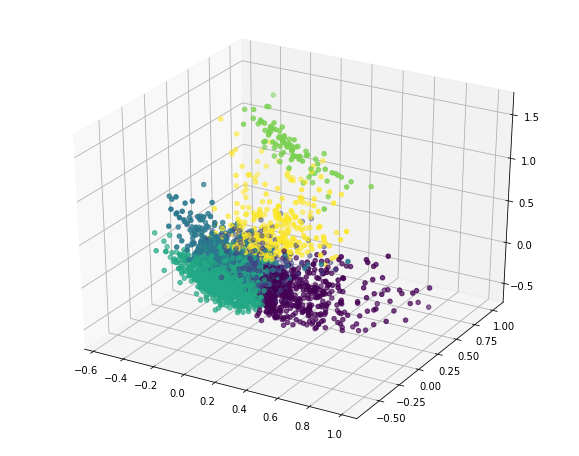

In [22]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111, projection = '3d')
x_ax = np.array(pca3_to_plot[:, 2]).flatten()
y_ax = np.array(pca3_to_plot[:, 1]).flatten()
z_ax = np.array(pca3_to_plot[:, 0]).flatten()
ax.scatter(x_ax, y_ax, z_ax, c = kmeans6, marker = 'o')
plt.show()